# Where Should You Live? A Data-Driven Comparison of the U.S. States

In [103]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# STEP 2: Load Data
health = pd.read_csv("/Users/jonighmcgee/Downloads/healthcare_best_states_2024.csv")
jobs = pd.read_csv("/Users/jonighmcgee/Downloads/job_opportunities_unemployment.csv")
climate = pd.read_csv("/Users/jonighmcgee/Downloads/climate_summary_full.csv")
education = pd.read_csv("/Users/jonighmcgee/Downloads/education_rankings.csv")
cost = pd.read_csv("/Users/jonighmcgee/Downloads/cost-of-living-index-by-state-2025.csv")
crime = pd.read_csv("/Users/jonighmcgee/Downloads/crime-rate-by-state-2025.csv")

In [105]:
# STEP 3: Make Clean Copies
health = health.copy()
jobs = jobs.copy()
climate = climate.copy()
education = education.copy()
cost = cost.copy()
crime = crime.copy()

In [106]:
# STEP 4: Load & Preview Data
print(health.head())
print(jobs.head())
print(climate.head())
print(education.head())
print(cost.head())
print(crime.head())

           State  Health Care Overall Rank  Health Care Access Rank  \
0         Hawaii                         1                        1   
1  Massachusetts                         2                        2   
2    Connecticut                         3                        6   
3     New Jersey                         4                        7   
4   Rhode Island                         5                        5   

   Health Care Quality Rank  Public Health Rank  Best State Overall Rank  
0                         2                   1                       34  
1                         1                   7                       10  
2                         4                   4                       20  
3                         3                   5                       14  
4                         7                   6                       26  
          State  Unemployment Rate (%)
0  South Dakota                    1.8
1  North Dakota                    2.6
2     

In [107]:
# STEP 5: Clean Data
#stateFlagCode unnecessary 
cost.drop(columns=['stateFlagCode'], inplace=True)
crime.drop(columns=['stateFlagCode'], inplace=True)

In [108]:
# Rename state columns to match for merging
for df in [health, jobs, climate, education, cost, crime]:
    df.rename(columns={'state': 'State'}, inplace=True)

In [109]:
#rename columns 
cost.rename(columns = {
   'CostOfLivingIndex_CostOfLivingIndex_num_2024' : 'CostOfLivingIndex_24',
    'CostOfLivingIndex_GroceriesCostsIndex_num_2024': 'CostOf_Groceries',
    'CostOfLivingIndex_HousingCostsIndex_num_2024' : 'CostOf_Housing',
    'CostOfLivingIndex_UtilitiesCostsIndex_num_2024' : 'CostOf_Utilities',
    'CostOfLivingIndex_TransportationCostsIndex_num_2024' : 'CostOf_Transportation',
    'CostOfLivingIndex_HealthCostsIndex_num_2024' : 'CostOf_HealthCare',
    'CostOfLivingIndex_MiscCostsIndex_num_2024' : 'CostOf_Misc'
    
}, inplace = True)

health.rename(columns = {
    'Health Care Overall Rank' : 'Health_Care_Overall',
    'Health Care Access Rank' : 'Health_Care_Access',
    'Health Care Quality Rank' : 'Health_Care_Quality',
    'Public Health Rank' : 'Public_Health',
    'Best State Overall Rank' : 'Best_State_Overall'
}, inplace = True)

crime.rename(columns = {
    'CrimeRate_TotalNumberOfCrimes_2023' : 'Tot_Count_Crimes_23',
    'CrimeRate_TotalCrimeRate_ratePer100k_2023' : 'Tot_CrimeRate_Per100k',
    'CrimeRate_ViolentCrimesTotalNumber_num_2023' : 'Tot_Count_ViolentCrimes',
    'CrimeRate_ViolentCrimesTotalRate_ratePer100k_2023' : 'Tot_ViolentCrimesRate_Per100k',
    'CrimeRate_HomicidesCount_num_2023' : 'HomicidesCount',
    'CrimeRate_RapeCount_num_2023' : 'RapeCount',
    'CrimeRate_RobberyCount_num_2023' : 'RobberyCount',
    'CrimeRate_AggravatedAssaultCount_num_2023' : 'AggAssaultCount',
    'CrimeRate_NonViolentCrimesTotalNumber_num_2023' : 'Tot_Count_NonViolentCrimes',
    'CrimeRate_NonViolentCrimesTotalRate_rateper100k_2023' : 'Tot_NonViolent_CrimeRate_Per100k',
    'CrimeRate_BurglaryCount_num_2023' : 'BurglaryCount',
    'CrimeRate_LarcenyCount_num_2023' : 'LarcenyCount',
    'CrimeRate_VehicleTheftCount_num_2023' : 'VehicleTheftCount'
}, inplace = True)

education.rename(columns = {
    'Rank' : 'Education_Rank'
}, inplace= True)

In [110]:
# STEP 6: Merge DF's
merged_df = health \
    .merge(jobs, on="State", how="left") \
    .merge(climate, on="State", how="left") \
    .merge(education, on="State", how="left") \
    .merge(cost, on="State", how="left") \
    .merge(crime, on="State", how="left")
#make a copy of df
merged_df = merged_df.copy()
merged_df

,State,Health_Care_Overall,Health_Care_Access,Health_Care_Quality,Public_Health,Best_State_Overall,Unemployment Rate (%),Average Annual Temp (°F),Average Annual Precipitation (inches),Education_Rank,...,Tot_ViolentCrimesRate_Per100k,HomicidesCount,RapeCount,RobberyCount,AggAssaultCount,Tot_Count_NonViolentCrimes,Tot_NonViolent_CrimeRate_Per100k,BurglaryCount,LarcenyCount,VehicleTheftCount
0,Hawaii,1,1,2,1,34,2.9,70.0,63.7,NaN,...,187.09,20,407,638,1620,23962,1669.67,2524,17083,4355
1,Massachusetts,2,2,1,7,10,3.8,47.9,47.7,1.0,...,314.19,146,1910,2560,17382,77067,1100.74,9231,59672,8164
2,Connecticut,3,6,4,4,20,3.6,49.0,50.3,2.0,...,150.23,135,728,1569,3002,56371,1558.43,4623,41187,10561
3,New Jersey,4,7,3,5,14,3.8,52.7,47.6,3.0,...,221.34,264,1660,4635,14005,141370,1521.61,14382,109269,17719
4,Rhode Island,5,5,7,6,26,3.9,50.1,47.9,NaN,...,167.80,28,402,241,1168,12285,1120.93,1297,9452,1536
5,California,6,9,5,11,37,3.9,59.4,22.2,NaN,...,508.24,1929,14190,49977,131940,906176,2325.60,135369,571215,199592
6,Maryland,7,4,9,10,22,3.0,54.2,44.3,10.0,...,426.16,515,1973,8079,15771,128001,2071.13,11487,82682,33832
7,New York,8,3,8,18,23,3.8,45.4,41.8,NaN,...,389.85,595,4900,20578,50225,352015,1798.64,29905,286473,35637
8,Delaware,9,8,14,8,21,3.8,55.3,45.7,NaN,...,380.18,46,194,535,3148,19405,1880.53,1823,15075,2507
9,Washington,10,11,6,14,8,3.8,48.3,38.4,NaN,...,357.22,373,2917,6416,18203,225535,2886.71,37583,134730,53222


In [111]:
merged_df.columns

Index(['State', 'Health_Care_Overall', 'Health_Care_Access',
       'Health_Care_Quality', 'Public_Health', 'Best_State_Overall',
       'Unemployment Rate (%)', 'Average Annual Temp (°F)',
       'Average Annual Precipitation (inches)', 'Education_Rank',
       'CostOfLivingIndex_24', 'CostOf_Groceries', 'CostOf_Housing',
       'CostOf_Utilities', 'CostOf_Transportation', 'CostOf_HealthCare',
       'CostOf_Misc', 'Tot_Count_Crimes_23', 'Tot_CrimeRate_Per100k',
       'Tot_Count_ViolentCrimes', 'Tot_ViolentCrimesRate_Per100k',
       'HomicidesCount', 'RapeCount', 'RobberyCount', 'AggAssaultCount',
       'Tot_Count_NonViolentCrimes', 'Tot_NonViolent_CrimeRate_Per100k',
       'BurglaryCount', 'LarcenyCount', 'VehicleTheftCount'],
      dtype='object')

In [112]:
merged_df.head(10)

,State,Health_Care_Overall,Health_Care_Access,Health_Care_Quality,Public_Health,Best_State_Overall,Unemployment Rate (%),Average Annual Temp (°F),Average Annual Precipitation (inches),Education_Rank,...,Tot_ViolentCrimesRate_Per100k,HomicidesCount,RapeCount,RobberyCount,AggAssaultCount,Tot_Count_NonViolentCrimes,Tot_NonViolent_CrimeRate_Per100k,BurglaryCount,LarcenyCount,VehicleTheftCount
0,Hawaii,1,1,2,1,34,2.9,70.0,63.7,NaN,...,187.09,20,407,638,1620,23962,1669.67,2524,17083,4355
1,Massachusetts,2,2,1,7,10,3.8,47.9,47.7,1.0,...,314.19,146,1910,2560,17382,77067,1100.74,9231,59672,8164
2,Connecticut,3,6,4,4,20,3.6,49.0,50.3,2.0,...,150.23,135,728,1569,3002,56371,1558.43,4623,41187,10561
3,New Jersey,4,7,3,5,14,3.8,52.7,47.6,3.0,...,221.34,264,1660,4635,14005,141370,1521.61,14382,109269,17719
4,Rhode Island,5,5,7,6,26,3.9,50.1,47.9,NaN,...,167.80,28,402,241,1168,12285,1120.93,1297,9452,1536
5,California,6,9,5,11,37,3.9,59.4,22.2,NaN,...,508.24,1929,14190,49977,131940,906176,2325.60,135369,571215,199592
6,Maryland,7,4,9,10,22,3.0,54.2,44.3,10.0,...,426.16,515,1973,8079,15771,128001,2071.13,11487,82682,33832
7,New York,8,3,8,18,23,3.8,45.4,41.8,NaN,...,389.85,595,4900,20578,50225,352015,1798.64,29905,286473,35637
8,Delaware,9,8,14,8,21,3.8,55.3,45.7,NaN,...,380.18,46,194,535,3148,19405,1880.53,1823,15075,2507
9,Washington,10,11,6,14,8,3.8,48.3,38.4,NaN,...,357.22,373,2917,6416,18203,225535,2886.71,37583,134730,53222


In [113]:
merged_df.tail(10)

,State,Health_Care_Overall,Health_Care_Access,Health_Care_Quality,Public_Health,Best_State_Overall,Unemployment Rate (%),Average Annual Temp (°F),Average Annual Precipitation (inches),Education_Rank,...,Tot_ViolentCrimesRate_Per100k,HomicidesCount,RapeCount,RobberyCount,AggAssaultCount,Tot_Count_NonViolentCrimes,Tot_NonViolent_CrimeRate_Per100k,BurglaryCount,LarcenyCount,VehicleTheftCount
40,Indiana,41,42,41,42,30,3.7,52.1,42.0,NaN,...,332.17,386,2338,2773,17297,105905,1543.31,14979,74753,16173
41,Tennessee,42,43,42,43,27,3.7,57.6,54.2,NaN,...,628.21,703,2678,5095,36293,168314,2361.81,21145,115002,32167
42,South Dakota,43,44,43,44,11,1.8,45.2,19.1,NaN,...,349.72,27,462,188,2538,14878,1618.37,2042,10585,2251
43,Alabama,44,45,44,45,44,3.3,62.8,56.0,NaN,...,403.94,524,1514,1832,16765,86793,1699.00,13009,63333,10451
44,Missouri,45,46,45,46,35,3.8,54.5,42.2,NaN,...,458.66,564,2877,3280,21698,129824,2095.23,15563,84604,29657
45,Louisiana,46,47,46,47,50,3.9,66.4,60.1,NaN,...,548.02,663,2157,2436,19809,120298,2630.18,20443,82592,17263
46,Arkansas,47,48,47,48,47,3.9,60.4,50.6,NaN,...,619.87,289,2219,1154,15354,68378,2228.94,12518,49166,6694
47,West Virginia,48,49,48,49,46,3.8,51.8,44.6,NaN,...,265.47,87,823,199,3590,21153,1195.04,3156,16355,1642
48,Oklahoma,49,50,49,50,43,3.3,59.6,36.5,NaN,...,413.68,247,2376,1510,12637,87097,2148.51,18586,57816,10695
49,Mississippi,50,51,50,51,48,3.9,63.4,59.0,NaN,...,202.78,204,958,630,4169,46657,1587.14,8946,32141,5570


In [114]:
# STEP 7: Handle Missing Values 

# Check sum NaN values 
merged_df.isnull().sum() #Education_Rank = 40 NaN Values

#Drop the 40 NaN, keepig 10 ranked states 
## Ensure consistent, complete, and unbiased analysis
merged_df = merged_df.dropna(subset=['Education_Rank'])

#Reset Index
#Drop = True excludes original index from new DF
merged_df = merged_df.reset_index(drop=True)
merged_df

,State,Health_Care_Overall,Health_Care_Access,Health_Care_Quality,Public_Health,Best_State_Overall,Unemployment Rate (%),Average Annual Temp (°F),Average Annual Precipitation (inches),Education_Rank,...,Tot_ViolentCrimesRate_Per100k,HomicidesCount,RapeCount,RobberyCount,AggAssaultCount,Tot_Count_NonViolentCrimes,Tot_NonViolent_CrimeRate_Per100k,BurglaryCount,LarcenyCount,VehicleTheftCount
0,Massachusetts,2,2,1,7,10,3.8,47.9,47.7,1.0,...,314.19,146,1910,2560,17382,77067,1100.74,9231,59672,8164
1,Connecticut,3,6,4,4,20,3.6,49.0,50.3,2.0,...,150.23,135,728,1569,3002,56371,1558.43,4623,41187,10561
2,New Jersey,4,7,3,5,14,3.8,52.7,47.6,3.0,...,221.34,264,1660,4635,14005,141370,1521.61,14382,109269,17719
3,Maryland,7,4,9,10,22,3.0,54.2,44.3,10.0,...,426.16,515,1973,8079,15771,128001,2071.13,11487,82682,33832
4,Pennsylvania,11,13,10,20,40,3.8,48.8,42.6,9.0,...,266.43,861,3256,8230,22187,204670,1579.04,17896,152449,34325
5,New Hampshire,13,10,12,15,2,3.1,43.8,43.0,6.0,...,107.20,26,499,225,753,12463,888.91,779,10848,836
6,Virginia,15,12,15,17,13,3.2,55.1,43.3,4.0,...,236.23,520,2595,3283,14191,144566,1658.69,10665,118839,15062
7,Minnesota,16,17,16,13,4,3.1,41.2,27.3,7.0,...,261.14,180,2043,2782,9979,97682,1702.40,10523,71839,15320
8,Vermont,17,19,17,2,7,2.6,42.9,42.7,5.0,...,210.36,16,198,94,1054,11615,1793.92,898,10124,593
9,Wisconsin,22,21,22,22,17,3.2,43.1,33.5,8.0,...,288.57,283,2156,2285,12333,71929,1216.88,7619,54374,9936


In [115]:
# STEP 8: Create Summary DF for Analysis
# Summary DF to Focus only specified columns
summary_columns = [
    'Best_State_Overall',
    'Health_Care_Overall',
    'CostOfLivingIndex_24',
    'Tot_CrimeRate_Per100k',
    'Tot_ViolentCrimesRate_Per100k',
    'Tot_NonViolent_CrimeRate_Per100k']

summary_df = merged_df[summary_columns]

In [116]:
# STEP 9: Deeper Analysis: Best/Worst States 
best_state = merged_df.loc[merged_df['Best_State_Overall'].idxmin()]
worst_state = merged_df.loc[merged_df['Best_State_Overall'].idxmax()]

print("Best ranked state:", best_state['State'])
print("Worst ranked state:", worst_state['State'])

Best ranked state: New Hampshire
Worst ranked state: Pennsylvania


In [117]:
# Top 3 best health care states (lowest rank)
top3_health = merged_df.sort_values('Health_Care_Overall').head(3)
print("Top 3 States for Health Care Overall Rank:")
print(top3_health[['State', 'Health_Care_Overall']])

# Bottom 3 worst health care states (highest rank)
bottom3_health = merged_df.sort_values('Health_Care_Overall', ascending=False).head(3)
print("\nBottom 3 States for Health Care Overall Rank:")
print(bottom3_health[['State', 'Health_Care_Overall']])

Top 3 States for Health Care Overall Rank:
           State  Health_Care_Overall
0  Massachusetts                    2
1    Connecticut                    3
2     New Jersey                    4

Bottom 3 States for Health Care Overall Rank:
       State  Health_Care_Overall
9  Wisconsin                   22
8    Vermont                   17
7  Minnesota                   16


In [118]:
# Top 3 most affordable states
top3_cost = merged_df.sort_values('CostOfLivingIndex_24').head(3)
print("Top 3 Most Affordable States:")
print(top3_cost[['State', 'CostOfLivingIndex_24']])

# Bottom 3 most expensive states
bottom3_cost = merged_df.sort_values('CostOfLivingIndex_24', ascending=False).head(3)
print("\nTop 3 Most Expensive States:")
print(bottom3_cost[['State', 'CostOfLivingIndex_24']])

Top 3 Most Affordable States:
          State  CostOfLivingIndex_24
4  Pennsylvania                  95.1
7     Minnesota                  95.1
9     Wisconsin                  97.0

Top 3 Most Expensive States:
           State  CostOfLivingIndex_24
0  Massachusetts                 145.9
3       Maryland                 115.3
2     New Jersey                 114.6


In [119]:
# Top 3 safest states
top3_crime = merged_df.sort_values('Tot_CrimeRate_Per100k').head(3)
print("Top 3 Safest States:")
print(top3_crime[['State', 'Tot_CrimeRate_Per100k']])

# Bottom 3 most dangerous states
bottom3_crime = merged_df.sort_values('Tot_CrimeRate_Per100k', ascending=False).head(3)
print("\nTop 3 Most Dangerous States:")
print(bottom3_crime[['State', 'Tot_CrimeRate_Per100k']])

Top 3 Safest States:
           State  Tot_CrimeRate_Per100k
5  New Hampshire                 996.11
0  Massachusetts                1414.93
9      Wisconsin                1505.44

Top 3 Most Dangerous States:
       State  Tot_CrimeRate_Per100k
3   Maryland                2497.29
8    Vermont                2004.28
7  Minnesota                1963.54


In [120]:
# STEP 10: Create Correlation Matrix from Summary DF
# Create correlation matrix
correlation_matrix = summary_df.corr()

# Print the matrix
print(correlation_matrix)

                                  Best_State_Overall  Health_Care_Overall  \
Best_State_Overall                          1.000000            -0.195762   
Health_Care_Overall                        -0.195762             1.000000   
CostOfLivingIndex_24                       -0.280271            -0.669509   
Tot_CrimeRate_Per100k                       0.347230            -0.025378   
Tot_ViolentCrimesRate_Per100k               0.344863            -0.071190   
Tot_NonViolent_CrimeRate_Per100k            0.310255            -0.011086   

                                  CostOfLivingIndex_24  Tot_CrimeRate_Per100k  \
Best_State_Overall                           -0.280271               0.347230   
Health_Care_Overall                          -0.669509              -0.025378   
CostOfLivingIndex_24                          1.000000              -0.216781   
Tot_CrimeRate_Per100k                        -0.216781               1.000000   
Tot_ViolentCrimesRate_Per100k                 0.129086 

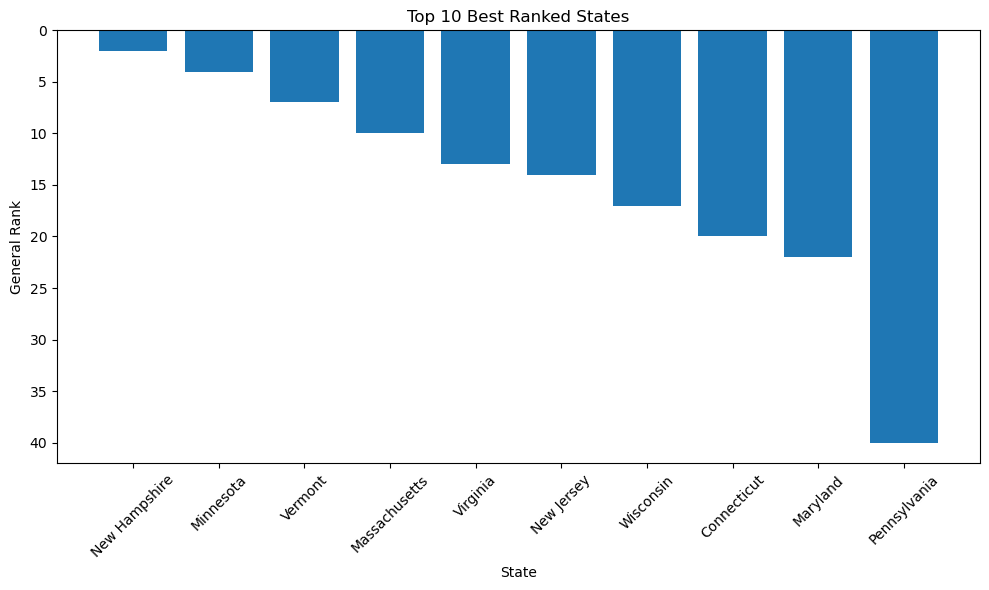

In [121]:
# STEP 11: VISUALIZATIONS - BAR CHART & HEATMAP
#Create bar chart
# Sort and select top 10 best-ranked states (lowest rank numbers)
top10 = merged_df.sort_values(by='Best_State_Overall').head(10)

# Reorder the DataFrame by 'Best_State_Overall' (ascending) for proper plotting order
top10 = top10.sort_values(by='Best_State_Overall')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top10['State'], top10['Best_State_Overall'])
plt.xlabel('State')
plt.ylabel('General Rank')
plt.title('Top 10 Best Ranked States')
plt.gca().invert_yaxis()  # Rank 1 at the top
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Figure 1: Top 10 states ranked by best overall general rank (lower rank = better).

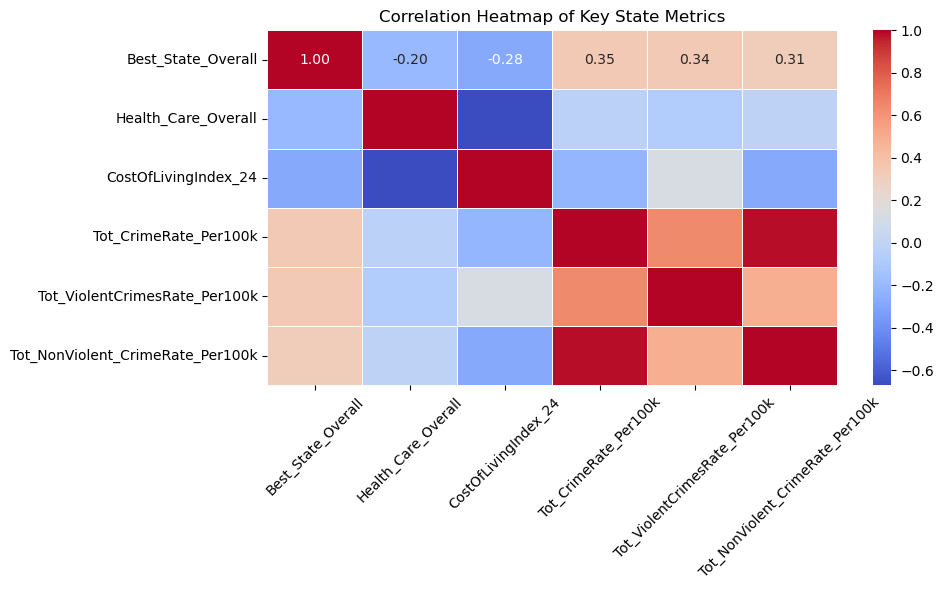

In [122]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key State Metrics")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Figure 2: Correlation Heatmap of Key State Metrics
Key interpretation rules:
1.00 (red) = perfect positive correlation

-1.00 (blue) = perfect negative correlation

0 (white/gray) = no correlation

The darker the color, the stronger the relationship

***Step 12: Interpretation of Figure 2
This heatmap visualizes how key state-level factors relate to one another using Pearson correlation coefficients (ranging from -1 to 1). Here's what we can interpret:

### Best_State_Overall (lower is better)

- **Positively correlated with crime metrics**:
  - `Tot_CrimeRate_Per100k` ≈ +0.35
  - `Tot_ViolentCrimesRate_Per100k` ≈ +0.34
  - `Tot_NonViolent_CrimeRate_Per100k` ≈ +0.31

  - As crime increases (both violent and non-violent), states tend to be ranked worse overall. Crime is moderately associated with overall quality of life.

- **Negatively correlated with health and cost**:
  - `Health_Care_Overall` ≈ -0.20
  - `CostOfLivingIndex_24` ≈ -0.28

  - States with better healthcare and higher cost of living tend to rank better overall. While not strongly correlated, the trend is consistent with better-resourced states scoring higher.

---

### Health_Care_Overall

- `CostOfLivingIndex_24` ≈ -0.67

  - Strong negative correlation: Better healthcare is often found in higher-cost states. This may reflect better-funded systems or more urban environments.

- Minimal correlation with crime:
  - Healthcare quality does not appear to be strongly associated with crime rates.

---

### Tot_CrimeRate_Per100k

- `Tot_ViolentCrimesRate_Per100k` ≈ +0.64
- `Tot_NonViolent_CrimeRate_Per100k` ≈ +0.98

  - Total crime is highly driven by non-violent offenses. Violent crime also contributes, but to a lesser extent. Non-violent crime (like theft or burglary) is more frequent and thus more influential on the total.

---

### Summary:

- Crime correlates moderately with worse state rankings.
- Better healthcare and higher living costs are associated with better overall rankings.
- Non-violent crime dominates total crime rates.
- Healthcare and crime operate largely independently.

In [123]:
# SETP 12: Analyze Relationships with Correlation Matrix
# Summary DF to Focus only specified columns
corr_columns = [
    'Best_State_Overall',
    'Health_Care_Overall',
    'CostOfLivingIndex_24',
    'Tot_CrimeRate_Per100k',
    'Tot_ViolentCrimesRate_Per100k',
    'Tot_NonViolent_CrimeRate_Per100k'
]

# Subset the original full DataFrame
summary_df = merged_df[corr_columns]

# Create correlation matrix
correlation_matrix = summary_df.corr()

# Print the matrix
print(correlation_matrix)


                                  Best_State_Overall  Health_Care_Overall  \
Best_State_Overall                          1.000000            -0.195762   
Health_Care_Overall                        -0.195762             1.000000   
CostOfLivingIndex_24                       -0.280271            -0.669509   
Tot_CrimeRate_Per100k                       0.347230            -0.025378   
Tot_ViolentCrimesRate_Per100k               0.344863            -0.071190   
Tot_NonViolent_CrimeRate_Per100k            0.310255            -0.011086   

                                  CostOfLivingIndex_24  Tot_CrimeRate_Per100k  \
Best_State_Overall                           -0.280271               0.347230   
Health_Care_Overall                          -0.669509              -0.025378   
CostOfLivingIndex_24                          1.000000              -0.216781   
Tot_CrimeRate_Per100k                        -0.216781               1.000000   
Tot_ViolentCrimesRate_Per100k                 0.129086 

# Where Should You Live? Final thoughts:

This project successfully combined six diverse datasets to evaluate key factors
that influence state-level quality of life in the U.S., including healthcare, cost of living, education, employment, climate, and crime.

After cleaning and merging the data, I created a summary DataFrame and explored
relationships using visualizations and a correlation heatmap. 

# Key Insights:
States with better healthcare and higher cost of living often ranked higher overall.
Crime rate had a moderate positive correlation with worse rankings, especially non-violent crime.
Healthcare quality and affordability showed a strong negative correlation, suggesting that 
better healthcare often comes at a higher cost.
Rankings are influenced by trade-offs — some affordable states may have higher crime, while safe or well-resourced states may be more expensive.

Overall, this analysis highlights how data can guide personal or policy decisions when choosing
a place to live. Additional enhancements could include more variables (e.g., housing markets, education outcomes) or building an interactive dashboard for public use.

# Conclusion:
Based on the data, Massachusetts emerges as the strongest recommendation for someone deciding where to live. It ranks among the top states in healthcare quality and access, holds the #1 spot in education, and maintains one of the lowest crime rates in the country. With a low unemployment rate of 3.8%, it also offers strong job opportunities. While the cost of living is higher, it reflects the state's excellent public resources and infrastructure. For those prioritizing affordability, Minnesota or Wisconsin also offer a solid balance of safety, cost, and quality of life.